In [1]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
#https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/


In [40]:
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=11)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=11)
 
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [3]:
wdir = '/mnt/c/Data/BSU/Photogrammetry/MicaSense_Plants/0033SET/000/'

In [4]:
blue = cv2.imread(wdir +'IMG_0001_1.tif')[:,:,0]
green = cv2.imread(wdir +'IMG_0001_2.tif')[:,:,0]
red = cv2.imread(wdir +'IMG_0001_3.tif')[:,:,0]
rededge = cv2.imread(wdir +'IMG_0001_4.tif')[:,:,0]
nir = cv2.imread(wdir +'IMG_0001_5.tif')[:,:,0]

In [5]:
# Find size of image1
sz = blue.shape

In [47]:
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION

In [48]:
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

In [55]:
#Specify the number of iterations
number_of_iterations = 25000

In [71]:
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-50

In [72]:
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

In [80]:
# Run the ECC algorithm. The results are stored in warp_matrix
(cc, warp_matrix) = cv2.findTransformECC(get_gradient(blue), get_gradient(green), warp_matrix, warp_mode, criteria, inputMask = None, gaussFiltSize = 81)

In [81]:
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    green_aligned = cv2.warpPerspective (green, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    green_aligned = cv2.warpAffine(green, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

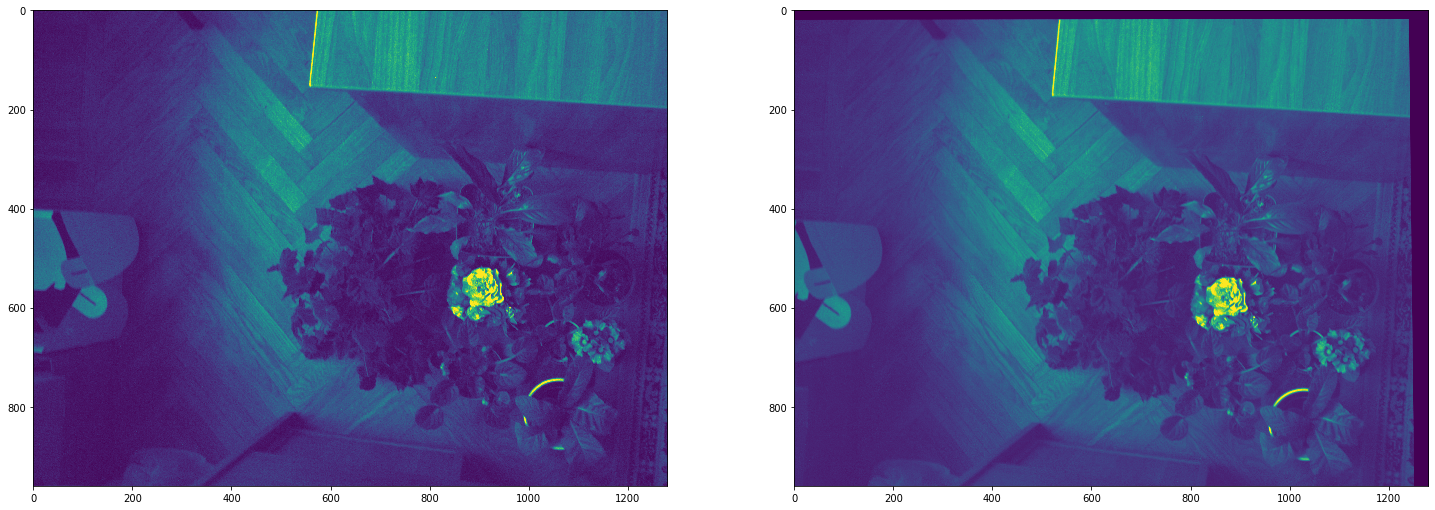

In [27]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.imshow(green)
plt.subplot(1, 2, 2)
plt.imshow(green_aligned)
plt.show()

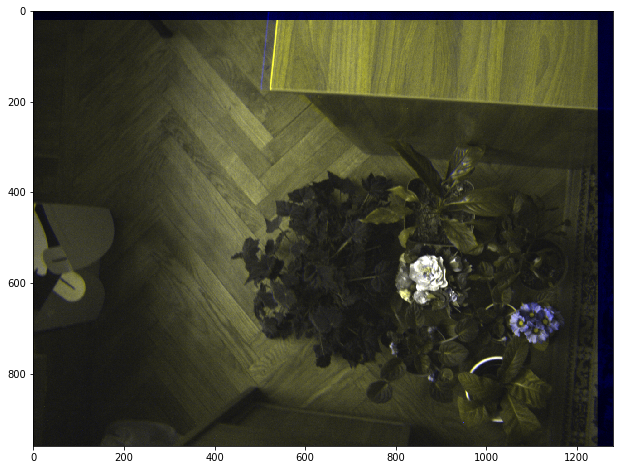

In [82]:
rgb_stack_transform = np.stack((green_aligned, green_aligned,  blue), axis = 2)
plt.figure(figsize=(18, 8))
plt.imshow(rgb_stack_transform)